In [62]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [56]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [57]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"plant village",
shuffle=True,
image_size= (IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [58]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

# Data Visualization¶

In [12]:
for image_batch,label_batch in dataset.take(1):
        print(image_batch.shape)
        print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 2 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]


In [13]:
for image_batch,label_batch in dataset.take(1):
        print(image_batch[0])
        #print(label_batch.numpy())

tf.Tensor(
[[[115. 102. 109.]
  [115. 102. 109.]
  [115. 102. 109.]
  ...
  [118. 105. 112.]
  [126. 113. 120.]
  [138. 125. 132.]]

 [[126. 113. 120.]
  [127. 114. 121.]
  [128. 115. 122.]
  ...
  [128. 115. 122.]
  [125. 112. 119.]
  [124. 111. 118.]]

 [[118. 105. 112.]
  [123. 110. 117.]
  [126. 113. 120.]
  ...
  [129. 116. 123.]
  [124. 111. 118.]
  [120. 107. 114.]]

 ...

 [[141. 135. 139.]
  [149. 143. 147.]
  [156. 150. 154.]
  ...
  [155. 146. 151.]
  [158. 149. 154.]
  [154. 145. 150.]]

 [[153. 147. 151.]
  [159. 153. 157.]
  [161. 155. 159.]
  ...
  [159. 150. 155.]
  [145. 136. 141.]
  [147. 138. 143.]]

 [[144. 138. 142.]
  [151. 145. 149.]
  [155. 149. 153.]
  ...
  [162. 153. 158.]
  [151. 142. 147.]
  [171. 162. 167.]]], shape=(256, 256, 3), dtype=float32)


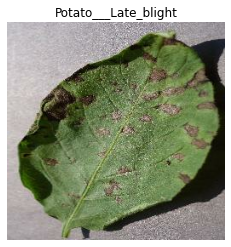

In [21]:
for image_batch,label_batch in dataset.take(1):
    for i in range(10):
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

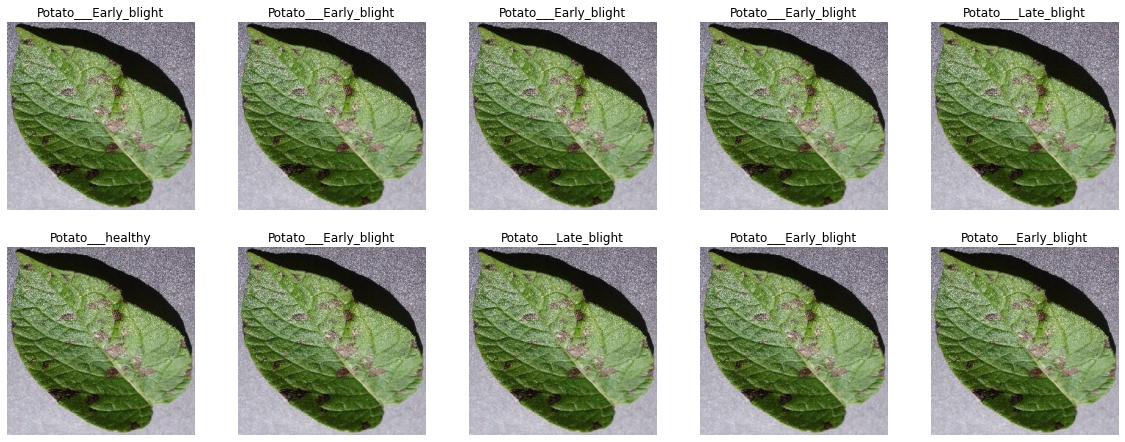

In [25]:
plt.figure(figsize=(20,20))
for image_batch,label_batch in dataset.take(1):
    for i in range(10):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

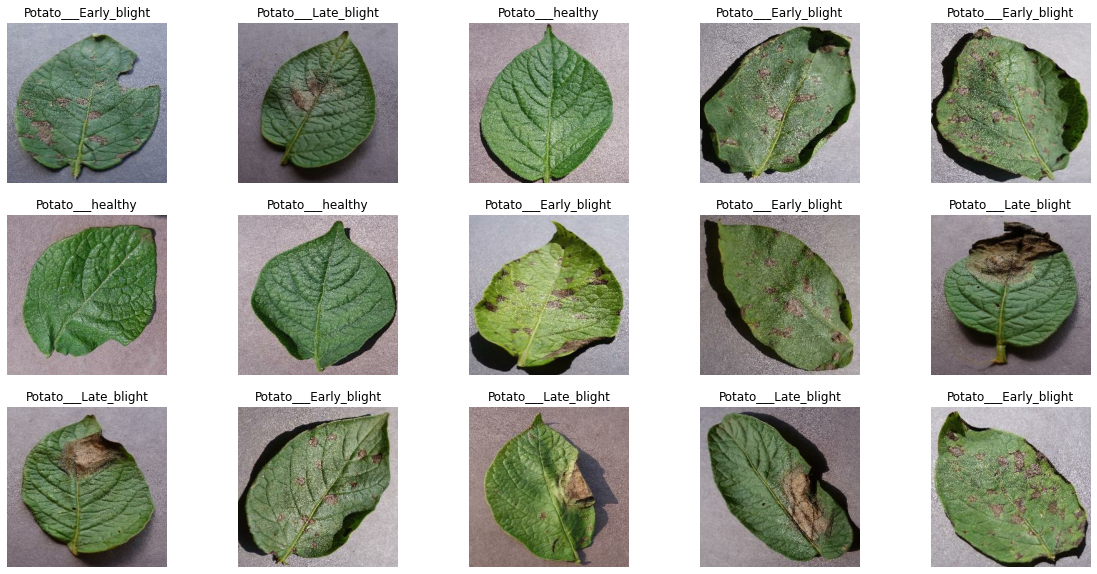

In [26]:
plt.figure(figsize=(20,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# SPLIT DATASET

80==>training
10% ==>validation
10%==> test

Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

1.Training: Dataset to be used while training
2.Validation: Dataset to be tested against while training
3.Test: Dataset to be tested against after we trained a model

In [27]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [28]:
train_ds=dataset.take(54)
len(train_ds)

54

In [35]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [31]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [36]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [37]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [59]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split* ds_size)
    val_size   =   int(val_split *ds_size)
    train_ds=ds.take(train_size)
    val_ds  = ds.skip(train_size).take(val_size)
    test_ds  = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [46]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [47]:
len(train_ds)

54

In [60]:
# performance improving by both using CPU and GPU
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# IMAGE PREPROSSING

In [64]:
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install --upgrade python

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [72]:
rescale_and_resize= tf.keras.models.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
    
])

# Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

Creating a Layer for Resizing and Normalization

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [74]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
    
])

# Applying Data Augmentation to Train Dataset

In [88]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# BUILDING A MODEL

In [92]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model= models.Sequential([
    rescale_and_resize,
    data_augmentation,
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax'),
])
model.build(input_shape=input_shape)

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [95]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [96]:
#model training
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
    
)

Epoch 1/50
54/54 [==============================] - 102s 2s/step - loss: 1.0746 - accuracy: 0.4664 - val_loss: 0.9605 - val_accuracy: 0.4115
Epoch 2/50
54/54 [==============================] - 95s 2s/step - loss: 0.8232 - accuracy: 0.6105 - val_loss: 0.7037 - val_accuracy: 0.7083
Epoch 3/50
54/54 [==============================] - 95s 2s/step - loss: 0.6142 - accuracy: 0.7431 - val_loss: 0.5535 - val_accuracy: 0.7812
Epoch 4/50
54/54 [==============================] - 108s 2s/step - loss: 0.4906 - accuracy: 0.7830 - val_loss: 0.3596 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 99s 2s/step - loss: 0.3821 - accuracy: 0.8391 - val_loss: 0.4309 - val_accuracy: 0.8125
Epoch 6/50
54/54 [==============================] - 98s 2s/step - loss: 0.2995 - accuracy: 0.8791 - val_loss: 0.3565 - val_accuracy: 0.8073
Epoch 7/50
54/54 [==============================] - 96s 2s/step - loss: 0.2826 - accuracy: 0.8883 - val_loss: 0.2468 - val_accuracy: 0.9010
Epoch 8/50
54/54 [

In [97]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 252ms/step - loss: 0.1124 - accuracy: 0.9648


In [98]:

scores

[0.11240632086992264, 0.96484375]

Scores is just a list containing loss and accuracy value

# Plotting the Accuracy and Loss Curves

In [99]:
history

In [100]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [101]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [102]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.07455575466156,
 0.8231666684150696,
 0.6141670346260071,
 0.4905608892440796,
 0.3821457624435425]

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

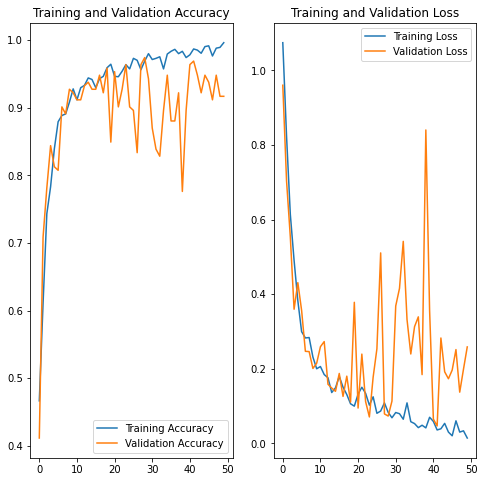

In [104]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Running prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 284ms/step
predicted label: Potato___Early_blight


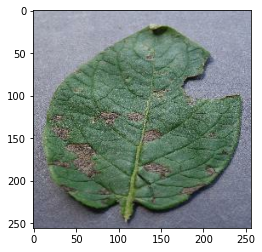

In [107]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
   
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

# Write a function for inference

In [108]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 35ms/step


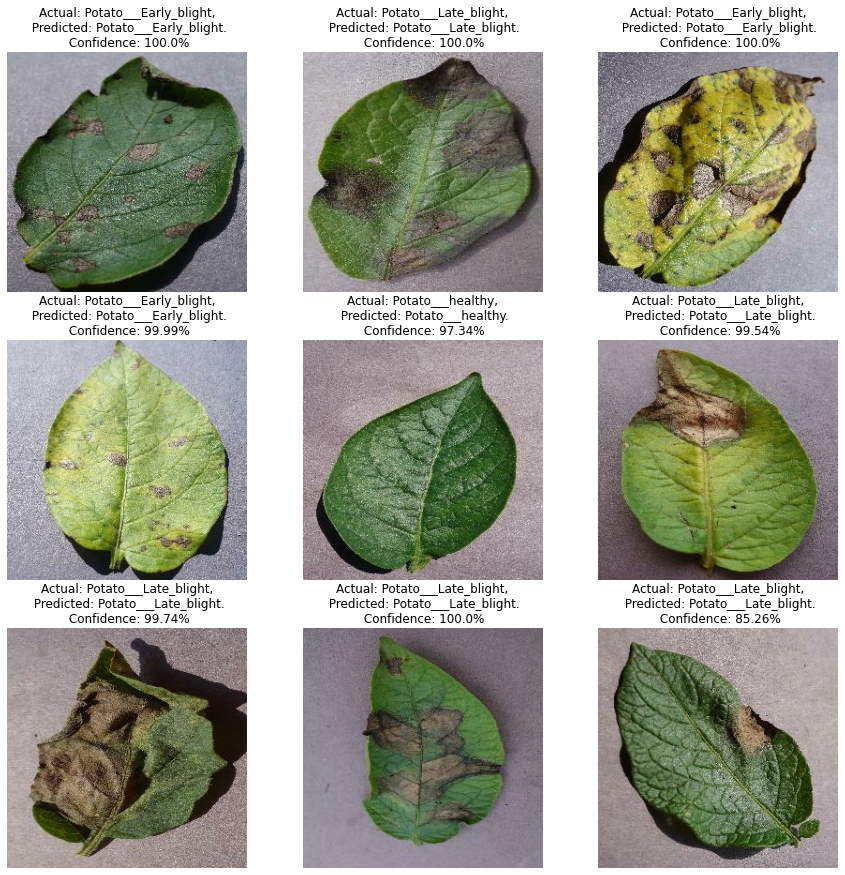

In [109]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Saving the Model
We append the model to the list of models as a new version

In [124]:
import os
model_version=max([int(i) for i in os.listdir("./models") + [0]])+1
model.save(f"./models/{model_version}")
#"C:\Users\shuda\plant village\models"

INFO:tensorflow:Assets written to: ./models/4\assets


INFO:tensorflow:Assets written to: ./models/4\assets


In [125]:
model.save("./potatoes.h5")

# error encountered when Implementing  this task

f [0, 2).  Label values: 1 1 0 1 0 0 1 0 1 1 0 2 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_3970]

# how we solved



In the last Dense layer we used model.add(Dense(2, activation='softmax')). Here 1 restricts its value from [0, 2) change its shape to the maximum output label. For eg your output is from label [0,7) then use model.add(Dense(7, activation='softmax'))